Imports

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


Reading data

In [2]:
# read train data
df_orders = pd.read_csv("orders.csv", sep=";")
df_products = pd.read_csv("product_attributes.csv", sep=",")
df_dists = pd.read_csv("cities_data.csv", sep=";")

# read test data
df_test = pd.read_csv("test.csv", sep=";")

Analisis data

In [3]:
df_orders

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False
...,...,...,...,...,...,...,...,...,...
114271,3f4b15fb770e,Rotterdam,v_002,CRF,Dusseldorf,Bordeaux,1681376,645,False
114272,d2e6978a38fd,Barcelona,v_004,DTD,Dusseldorf,Berlin,1676942,502,False
114273,b88babd5c7bd,Rotterdam,v_002,DTP,Dusseldorf,Rome,1692737,464,False
114274,b0b5c761613f,Barcelona,v_003,DTD,Dusseldorf,Munich,1699974,388,False


In [6]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114276 entries, 0 to 114275
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   order_id            114276 non-null  object
 1   origin_port         114276 non-null  object
 2   3pl                 114276 non-null  object
 3   customs_procedures  114276 non-null  object
 4   logistic_hub        113227 non-null  object
 5   customer            114276 non-null  object
 6   product_id          114276 non-null  int64 
 7   units               114276 non-null  int64 
 8   late_order          114276 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 7.1+ MB


In [7]:
df_orders.describe()

,product_id,units
count,1.142760e+05,114276.000000
mean,1.673412e+06,484.915310
std,5.805043e+04,68.387351
min,-1.000000e+00,1.000000
25%,1.658528e+06,447.000000
50%,1.681687e+06,486.000000
75%,1.692987e+06,522.000000
max,1.702654e+06,951.000000


In [10]:
df_orders['units']

0         583
1         459
2         464
3         678
4         353
         ... 
114271    645
114272    502
114273    464
114274    388
114275    482
Name: units, Length: 114276, dtype: int64

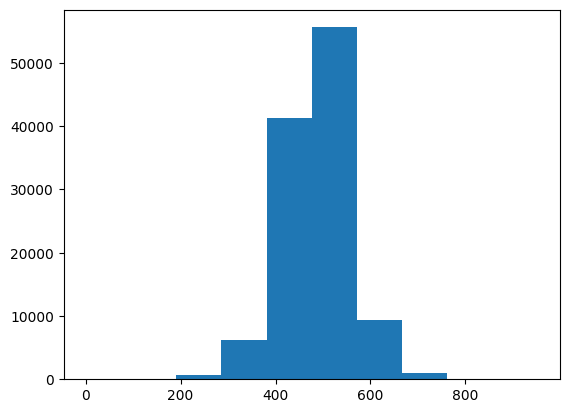

In [21]:
plt.hist(df_orders['units'])
plt.show()

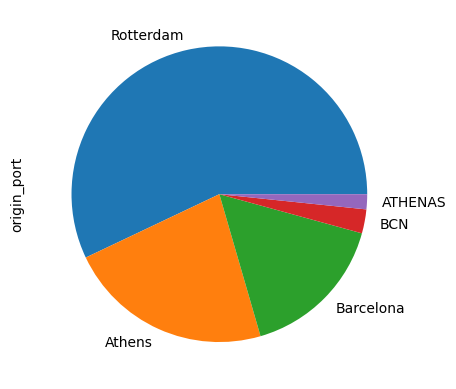

In [46]:
df_orders['origin_port'].value_counts().plot(kind='pie')
plt.show()

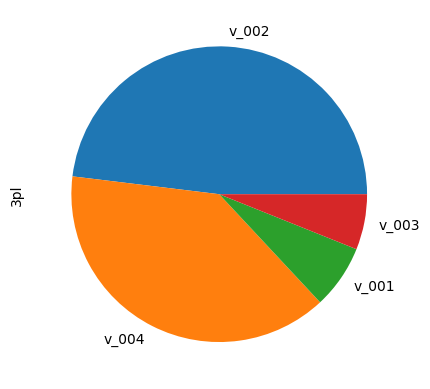

In [23]:
df_orders['3pl'].value_counts().plot(kind='pie')
plt.show()

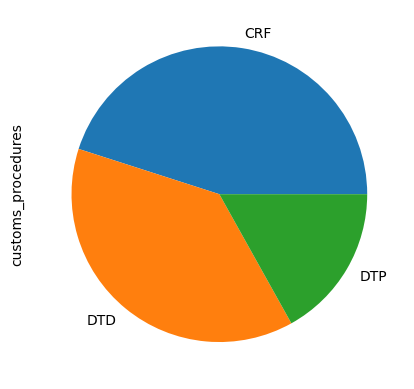

In [25]:
df_orders['customs_procedures'].value_counts().plot(kind='pie')
plt.show()

In [39]:
len(df_orders['logistic_hub'])

114276

In [41]:
df_orders['logistic_hub'].value_counts()

Venlo         23700
Hamburg       21480
Warsaw        15803
Dusseldorf    12518
Rome          12460
Lille         10248
Zaragoza       7886
Liege          4641
Bratislava     4491
Name: logistic_hub, dtype: int64

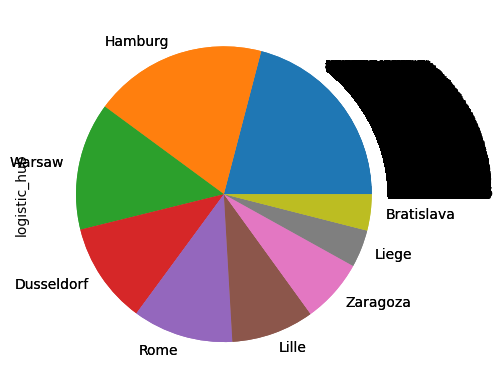

In [32]:
df_orders['logistic_hub'].value_counts().plot(kind='pie')
plt.show()


In [36]:
df_orders['late_order'].value_counts()


False    87120
True     27156
Name: late_order, dtype: int64

Probabilities


In [67]:

df_orders.groupby(['origin_port','3pl','logistic_hub','late_order']).sum()



C:\Users\jordi\AppData\Local\Temp\ipykernel_13580\3661025297.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_orders.groupby(['origin_port','3pl','logistic_hub','late_order']).sum()


product_id    units
origin_port 3pl   logistic_hub late_order                     
ATHENAS     v_001 Bratislava   True          11732091     2972
                  Dusseldorf   False         13432963     3723
                               True          16797783     4674
                  Hamburg      False         20098644     6037
                               True          23481361     7263
...                                               ...      ...
Rotterdam   v_004 Venlo        True        1047169783   325996
                  Warsaw       False       4848578186  1382649
                               True        1060848502   326266
                  Zaragoza     False       2021853061   577882
                               True         881428255   267694

[359 rows x 2 columns]

In [ ]:
df_orders.thumb_up.eq(1).groupby(df_orders.id1).mean()

test=df_orders.groupby(['origin_port','3pl','logistic_hub','late_order']).size().to_frame()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(test)


In [50]:
df_orders.['origin_port','logistic_hub']

KeyError: ('origin_port', 'logistic_hub')